In [1]:
#1a)
import numpy as np

# Define the correct sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the function f(w, b)
def f(w, b):
    return -np.log(sigmoid(w + b)) - np.log(sigmoid(1.5 * w + b)) - np.log(sigmoid(-2 * w - b))

# # Define the gradient of f(w, b)
# def grad_f(w, b):
#     sig_w_b = sigmoid(w + b)
#     sig_15w_b = sigmoid(1.5 * w + b)
#     sig_2w_b = sigmoid(-2 * w - b)
#     grad_w = -((1 - sig_w_b) - 1.5 * (1 - sig_15w_b) + 2 * (1 - sig_2w_b))
#     grad_b = -((1 - sig_w_b) - (1 - sig_15w_b) + (1 - sig_2w_b))
#     return np.array([grad_w, grad_b])

# Define the gradient of f(w, b)
def grad_f(w, b):
    grad_w = (-np.exp(b) + 1.5*np.exp(-0.5*w+b) - 0.5*np.exp(1.5*w+2*b) + 0.5*np.exp(0.5*w+b) - 2*np.exp(3*w+3*b) - np.exp(2*w+2*b) + 2.5*np.exp(-1.5*w)) / (np.log(10)*np.exp(0.5*w+b)*(np.exp(w+b)+1)*(np.exp(1.5*w+b)+1)*(np.exp(-2*w-b)+1))
    grad_b = (-np.exp(b) + np.exp(b-0.5*w) + np.exp(0.5*w+b) - np.exp(3*w+3*b) + 2*np.exp(-1.5*w)) / (np.log(10)*np.exp(0.5*w+b)*(np.exp(w+b)+1)*(np.exp(1.5*w+b)+1)*(np.exp(-2*w-b)+1))
    return np.array([grad_w, grad_b])

# Define the constant step size function
def eta_const(t, c=0.2):
    return c

# Define the gradient descent function
def gradient_descent(grad_f, eta, w_b_0, max_iter=100):
    w, b = w_b_0
    values = []  # To store the function values
    for t in range(max_iter):
        eta_t = eta(t)
        grad = grad_f(w, b)
        w, b = w - eta_t * grad[0], b - eta_t * grad[1]
        values.append(f(w, b))
    return (w, b), values

# Initialize parameters
w_b_0 = (1, 1)
max_iter = 100

# Perform gradient descent
(w_100, b_100), function_values = gradient_descent(grad_f, eta_const, w_b_0, max_iter)

# Final function value after 100 iterations and the minimum value found
final_function_value = function_values[-1]
min_function_value = min(function_values)

final_function_value, min_function_value

(46.1106818780674, 3.5568355716394384)

In [2]:
#1a)
import numpy as np

# Define the correct sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the function f(w, b)
def f(w, b):
    return -np.log(sigmoid(w + b)) - np.log(sigmoid(1.5 * w + b)) - np.log(sigmoid(-2 * w - b))

# Define the gradient of f(w, b)
def grad_f(w, b):
    # Compute the sigmoid terms
    sig_w_b = sigmoid(w + b)
    sig_15w_b = sigmoid(1.5 * w + b)
    sig_2w_b = sigmoid(-2 * w - b)

    # Compute the partial derivatives
    grad_w = - (1 - sig_w_b) - 1.5 * (1 - sig_15w_b) + 2 * (1 - sig_2w_b)
    grad_b = - (1 - sig_w_b) - (1 - sig_15w_b) + (1 - sig_2w_b)

    return np.array([grad_w, grad_b])

# Define the constant step size function
def eta_const(t, c=0.2):
    return c

# Define the gradient descent function
def gradient_descent(grad_f, eta, w_b_0, max_iter=100):
    w, b = w_b_0
    values = []  # To store the function values
    for t in range(max_iter):
        eta_t = eta(t)
        grad = grad_f(w, b)
        w, b = w - eta_t * grad[0], b - eta_t * grad[1]
        values.append(f(w, b))
    return (w, b), values

# Initialize parameters
w_b_0 = (1, 1)
max_iter = 100

# Perform gradient descent
(w_100, b_100), function_values = gradient_descent(grad_f, eta_const, w_b_0, max_iter)

# Final function value after 100 iterations and the minimum value found
final_function_value = function_values[-1]
min_function_value = min(function_values)

final_function_value, min_function_value



(1.0932277009188751, 1.0932277009188751)

In [3]:
#1b)
# Define the decreasing step size function
def eta_sqrt(t, c=0.2):
    return c / np.sqrt(t + 1) 

# Perform gradient descent with the new step size policy
(w_100_decreasing, b_100_decreasing), function_values_decreasing = gradient_descent(grad_f, eta_sqrt, w_b_0, max_iter)

# Final function value after 100 iterations and the minimum value found with decreasing step size
final_function_value_decreasing = function_values_decreasing[-1]
min_function_value_decreasing = min(function_values_decreasing)

final_function_value_decreasing, min_function_value_decreasing

(1.696568333337816, 1.696568333337816)

In [4]:
#1c)
# Define the multi-step step size function
def eta_multistep(t, milestones=[20, 50, 80], c=0.2, eta_init=0.2):
    # Determine the current step size based on the milestones
    eta = eta_init
    for milestone in milestones:
        if t >= milestone:
            eta *= c
        else:
            break
    return eta

# Perform gradient descent with the new multi-step step size policy
(w_100_multistep, b_100_multistep), function_values_multistep = gradient_descent(grad_f, eta_multistep, w_b_0, max_iter)

# Final function value after 100 iterations and the minimum value found with multi-step step size
final_function_value_multistep = function_values_multistep[-1]
min_function_value_multistep = min(function_values_multistep)

final_function_value_multistep, min_function_value_multistep

(1.5983060979559247, 1.5983060979559247)

In [5]:
#2a)
from scipy.optimize import minimize_scalar

# Define the function f(x)
def f(x):
    return 0.5 * x[0]**4 - x[0]*x[1] + x[1]**2 + x[1]*x[2] + x[2]**2

# Function to compute arg min for each coordinate
def argmin_x1(x2, x3):
    # Minimize with respect to x1
    result = minimize_scalar(lambda x1: f([x1, x2, x3]))
    return result.x

def argmin_x2(x1, x3):
    # Minimize with respect to x2
    result = minimize_scalar(lambda x2: f([x1, x2, x3]))
    return result.x

def argmin_x3(x1, x2):
    # Minimize with respect to x3
    result = minimize_scalar(lambda x3: f([x1, x2, x3]))
    return result.x

# Initial point
x0 = [2, 3, 4]

# Compute the arg min for each coordinate at x0
arg_min_x1 = argmin_x1(x0[1], x0[2])
arg_min_x2 = argmin_x2(x0[0], x0[2])
arg_min_x3 = argmin_x3(x0[0], x0[1])

arg_min_x1, arg_min_x2, arg_min_x3

(1.144714226062152, -1.0000000296199998, -1.5000000222100005)

In [6]:
#2b)
# Redefine argmin_xi functions to accept a full x vector and index i for updating
def argmin_xi(x, i):
    def objective(xi):
        x_new = x.copy()
        x_new[i] = xi
        return f(x_new)
    
    result = minimize_scalar(objective)
    return result.x

# Implement the coordinate descent function
def coordinate_descent(f, argmin_xi, x_0, max_iter=100):
    x = np.array(x_0, dtype=float)
    for t in range(max_iter):
        for i in range(len(x)):
            x[i] = argmin_xi(x, i)
    return x

# Initial point
x_0 = [1, 20, 5]

# Perform coordinate descent
x_star = coordinate_descent(f, argmin_xi, x_0)

# Now let's capture the first three coordinate update results for the first iteration
first_iter_results = []
x_temp = np.array(x_0, dtype=float)
for i in range(3):
    x_temp[i] = argmin_xi(x_temp, i)
    first_iter_results.append(x_temp[i])

first_iter_results, x_star

([2.1544346582609926, -1.4227826071852905, 0.7113913141312377],
 array([-0.57735027, -0.38490018,  0.19245009]))

In [7]:
#3a)
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression

# Load the dataset
california = fetch_california_housing()
X, y = california.data, california.target

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute the polynomial features
poly = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly.fit_transform(X_scaled)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_poly, y)

# Get feature names
feature_names = poly.get_feature_names_out(input_features=california.feature_names)

# Retrieve the regression coefficients
beta = model.coef_

# We'll use the feature names to find the indices of the desired coefficients
medinc_index = feature_names.tolist().index('MedInc')
avebedrms_index = feature_names.tolist().index('AveBedrms')
houseage_avebedrms_index = feature_names.tolist().index('HouseAge AveBedrms')

# Corresponding coefficients
beta_medinc = beta[medinc_index]
beta_avebedrms = beta[avebedrms_index]
beta_houseage_avebedrms = beta[houseage_avebedrms_index]

(beta_medinc, beta_avebedrms, beta_houseage_avebedrms)

(0.9224368884326622, 0.5621258213362399, 0.06328854538476249)

In [8]:
#3b)
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
import numpy as np

# Assuming X_scaled and y are already defined and have been processed as in the previous steps

# Define lambda
lambda_penalty = 0.1

# Initialize Ridge Regression model
ridge_model = Ridge(alpha=lambda_penalty)

# Fit the Ridge Regression model
ridge_model.fit(X_poly, y)

# Get the coefficients
ridge_coefs = ridge_model.coef_

# Feature names might be needed to identify the position of each required coefficient
# Assuming feature_names are defined as in the previous steps

# Retrieve the desired coefficients
beta_medinc = ridge_coefs[feature_names.tolist().index('MedInc')]
beta_medinc_avebedrms = ridge_coefs[feature_names.tolist().index('MedInc AveBedrms')]
beta_houseage_avebedrms = ridge_coefs[feature_names.tolist().index('HouseAge AveBedrms')]

(beta_medinc, beta_medinc_avebedrms, beta_houseage_avebedrms)

(0.9224724871539206, -0.16750690727957415, 0.06334533724790394)

In [9]:
#4)
import numpy as np

# True value at x0
f_star_x0 = np.tan(np.pi * 0)

# Model predictions at x0
f_D1_x0 = 0 + 0.2
f_D2_x0 = 0 + 0.3
f_D3_x0 = 0 + 0.1

# Average model prediction at x0
f_hat_x0 = np.mean([f_D1_x0, f_D2_x0, f_D3_x0])

# Bias squared at x0
bias_squared = (f_hat_x0 - f_star_x0) ** 2

# Variance at x0
variance = np.mean([(f_D1_x0 - f_hat_x0) ** 2, (f_D2_x0 - f_hat_x0) ** 2, (f_D3_x0 - f_hat_x0) ** 2])

bias_squared, variance

(0.039999999999999994, 0.006666666666666665)

In [ ]:
#5a)
from sklearn.datasets import fetch_20newsgroups
import numpy as np

# Fetch the training data for the specified categories
categories = ['alt.atheism', 'sci.space', 'talk.politics.guns']
train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

# Calculate the class prior probabilities p(y)
# This is typically the fraction of documents belonging to each class
class_counts = np.bincount(train.target, minlength=len(categories))
class_priors = class_counts / class_counts.sum()

class_priors_dict = {train.target_names[i]: class_priors[i] for i in range(len(categories))}
class_priors_dict

In [11]:
#5b)
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'sci.space', 'talk.politics.guns']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)
y_train = train.target

# Use CountVectorizer to transform text data to a bag-of-words representation
vectorizer = CountVectorizer(stop_words="english", min_df=5, token_pattern="[^\W\d_]+", binary=True)
D_train = vectorizer.fit_transform(train.data)

# Use the feature index directly from the vectorizer
feature_index = vectorizer.vocabulary_['naive']

# Calculate the probability using Laplace smoothing for each class
alpha = 1e-5  # Laplace smoothing parameter
vocabulary_size = len(vectorizer.vocabulary_)  # Size of the vocabulary

probabilities = {}
for class_label in range(len(categories)):
    class_word_counts = D_train[train.target == class_label].sum(axis=0)  # Sum counts for each word in the class
    word_count = class_word_counts[0, feature_index]  # Count for the word "naive"
    total_word_count = class_word_counts.sum()  # Total count of all words in the class
    prob = math.log((word_count + alpha) / (total_word_count + alpha * vocabulary_size))
    probabilities[train.target_names[class_label]] = prob

# Print the probabilities
print(probabilities)


#antwoorden moeten nog ingevuld worden!!!!!!!!!!

{'alt.atheism': -9.195571248744313, 'sci.space': -10.996072922516205, 'talk.politics.guns': -9.697798684037043}


In [12]:
#5c)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups
import numpy as np

# Fetch the training data
categories = ['alt.atheism', 'talk.politics.guns', 'sci.space']
train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))

# Vectorize the documents
vectorizer = CountVectorizer(stop_words='english', min_df=5, token_pattern=r"\b\w+\b", binary=True)
D_train = vectorizer.fit_transform(train.data)

# Get the class indices
y_train = train.target

# Calculate the total number of words in the vocabulary
total_vocab = len(vectorizer.get_feature_names_out())

# Laplace smoothing parameter
alpha = 1e-5

# Calculate word count per class and document count per class
word_count_per_class = np.zeros((len(categories), total_vocab))
doc_count_per_class = np.zeros(len(categories))
print(y_train)
for i in range(len(categories)):
    # Get all documents of class i
    class_i_docs = D_train[y_train == i]
    # Sum across documents to get total word counts for class i
    word_count_per_class[i, :] = class_i_docs.sum(axis=0)
    # Count the number of documents in class i
    doc_count_per_class[i] = class_i_docs.shape[0]

# Apply Laplace smoothing to word counts and calculate log probabilities
log_prob_x_given_y = np.log((word_count_per_class + alpha) / 
                            (doc_count_per_class[:, None] + alpha * total_vocab))

# Get the word vector for the first document
first_doc_vector = D_train[0].toarray()[0]

# Calculate prior probabilities for each class
prior_prob = np.log(doc_count_per_class / y_train.shape[0])

# Calculate the log probabilities for the first document for each class
log_probs_first_doc = prior_prob + (first_doc_vector * log_prob_x_given_y).sum(axis=1)

log_probs_first_doc

[2 2 1 ... 1 2 2]


array([-110.10545536,  -87.85047595,  -72.26902834])

In [13]:
#6a&b)
from sklearn.datasets import load_iris
iris = load_iris()
D, y = iris.data, iris.target


# Load the Iris dataset
iris = load_iris()

# Extract the target values (class labels)
target = iris.target


# Calculate the class distribution
class_distribution = np.bincount(target)

# Calculate Gini impurity
total_samples = len(target)
gini_impurity_old = 1 - sum((count/total_samples)**2 for count in class_distribution)

print(f"Gini impurity for the Iris dataset: {gini_impurity_old:.4f}")

# ## SVM

def gini_impurity(labels):
    """Calculate the Gini impurity for a list of labels"""
    unique_labels = set(labels)
    impurity = 1.0
    for label in unique_labels:
        prob_of_label = np.sum(labels == label) / len(labels)
        impurity -= prob_of_label ** 2
    return impurity

def split_cost(left_labels, right_labels):
    """Calculate the weighted Gini impurity for a split"""
    n = len(left_labels) + len(right_labels)
    print(left_labels, right_labels)
    print(gini_impurity(left_labels+right_labels))
    left_impurity = gini_impurity(left_labels)
    right_impurity = gini_impurity(right_labels)
    gini = (len(left_labels) / n) * left_impurity + (len(right_labels) / n) * right_impurity
    return gini

target_larger = []
target_smaller = []
mean = 5.84

for i in range(len(D[:,0])):
    sample = D[:,0][i]
    tar = target[i]
    if sample > mean:
        target_larger.append(tar)
    else: 
        target_smaller.append(tar)

larger_distribution = np.bincount(target_larger)
smaller_distribution = np.bincount(target_smaller)
gini_new = split_cost(target_larger, target_smaller)
# Calculate the cost of the split
#cost = split_cost(left_labels, right_labels)
print(f"The cost of the split is", gini_new-gini_impurity_old)

Gini impurity for the Iris dataset: 0.6667
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2]
0.6666666666666665
The cost of the split is -0.17476190476190478


In [14]:
#7a)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the digits dataset
digits = datasets.load_digits()

# Flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create target vector
target = digits.target

# Split data into 70% train and 30% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.3, shuffle=False)

# Create a classifier: a support vector classifier with RBF kernel
gamma_value = 0.005
C_value = 9.0
svm = SVC(gamma=gamma_value, C=C_value)

# Learn the digits on the train subset
svm.fit(X_train, y_train)

# Predict the value of the digits on the test subset
predicted = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted)
print(f"The accuracy of the SVM classifier on the test data is: {accuracy:.2%}")

The accuracy of the SVM classifier on the test data is: 89.26%


In [17]:
#7c)
from sklearn import svm

# Assuming `X_train` and `y_train` are your training data and labels
# Train the SVM model
model = svm.SVC(kernel='rbf')  # Or whichever kernel you're using
model.fit(X_train, y_train)

# Retrieve the number of support vectors for each class
n_support = model.n_support_

# n_support_ is an array that contains the number of support vectors for each class
# For a one-vs-one classifier, you need the support vectors for classes 0 and 1
num_support_vectors_0_1 = n_support[0] + n_support[1]

print(f"Number of support vectors for classes 0 and 1: {num_support_vectors_0_1}")
print(n_support)

Number of support vectors for classes 0 and 1: 106
[38 68 53 62 53 56 40 62 82 78]


NameError: name 'support_vectors_class_1' is not defined

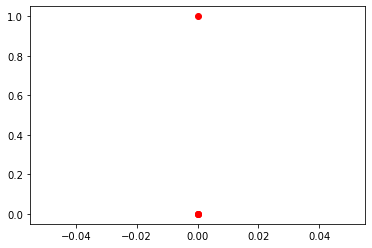

In [21]:
#7d)
import matplotlib.pyplot as plt

plt.scatter(support_vectors_class_0[:, 0], support_vectors_class_0[:, 1], color='red', label='Class 0')
plt.scatter(support_vectors_class_1[:, 0], support_vectors_class_1[:, 1], color='blue', label='Class 1')
plt.legend()
plt.show()

In [22]:
#7d)
import matplotlib.pyplot as plt

# Plot the support vectors for each class
# This is a hypothetical function that would need to be adjusted to your specific case
def plot_support_vectors(support_vectors, labels):
    plt.figure(figsize=(12, 8))
    for i, sv in enumerate(support_vectors):
        plt.subplot(2, 4, i + 1)
        plt.imshow(sv.reshape(8, 8), cmap=plt.cm.gray)
        plt.title(f"Class {labels[i]} SV")
        plt.axis('off')
    plt.show()

# Select support vectors from each class
# This would require sorting or some other selection criterion
support_vectors_class_0 = model.support_vectors_[model.support_[:4]]
support_vectors_class_1 = model.support_vectors_[model.support_[-4:]]

# Hypothetical labels for the plot, adjust as necessary
labels = [0, 0, 0, 0, 1, 1, 1, 1]

# Plotting the support vectors
plot_support_vectors(np.vstack((support_vectors_class_0, support_vectors_class_1)), labels)

IndexError: index 1152 is out of bounds for axis 0 with size 592

In [ ]:
#7d)
# After fitting the SVM model
support_vectors = model.support_vectors_
support_indices = model.support_

# Get the support vector indices for classes 0 and 1
support_vectors_class_0 = support_vectors[support_indices[y_train[support_indices] == 0]]
support_vectors_class_1 = support_vectors[support_indices[y_train[support_indices] == 1]]

In [ ]:
#7d)
# Code to print details about the dataset and the trained SVM model.

# Print the number of samples and features in the dataset
print(f"Number of samples: {X_train.shape[0]}")
print(f"Number of features per sample: {X_train.shape[1]}")

# Check if the features are scaled (we'll just print the first 5 samples for brevity)
print("First 5 samples of features:")
print(X_train[:5])

# Print details about the trained SVM model
print(f"Kernel used in SVM: {model.kernel}")
print(f"Number of support vectors for each class: {model.n_support_}")
print(f"Indices of support vectors: {model.support_[:5]}")  # Print first 5 for brevity
print(f"Dual coefficients (first 5): {model.dual_coef_[:,:5]}")  # Print first 5 for brevity


In [ ]:
#7e)
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Load the dataset (for example, the digits dataset)
digits = load_digits()
X, y = digits.data, digits.target

# Initialize the SVC model
svc = SVC(kernel='rbf')

# Define the parameter grid
param_grid = {
    'C': [0.6, 0.8, 1, 2, 4],
    'gamma': [0.0001, 0.0005, 0.001, 0.005]
}

# Initialize the GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validated score:", best_score)

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import fetch_20newsgroups

# Fetch the training data for the classes specified
categories = ['alt.atheism', 'talk.politics.guns', 'sci.space']
train = fetch_20newsgroups(subset='train', categories=categories)

# Vectorize the documents
vectorizer = CountVectorizer(stop_words='english', min_df=5, token_pattern=r"\b\w+\b", binary=True)
D_train = vectorizer.fit_transform(train.data)
D_test = vectorizer.transform(train.data)  # Assuming you want to transform the same data here for demonstration

# Train the Naive Bayes classifier
alpha = 1e-5  # Laplace smoothing parameter
clf = MultinomialNB(alpha=alpha)
clf.fit(D_train, train.target)

# Retrieve the class log prior probabilities
log_prior = clf.class_log_prior_

# Retrieve the log conditional probabilities of features given a class
log_prob = clf.feature_log_prob_

# Get the word counts for the first document
first_doc_vector = D_train[0].toarray()[0]

# Calculate the log probabilities for the first document for each class
log_prob_x0_y = log_prior + np.dot(first_doc_vector, log_prob.T)

log_prob_x0_y

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups
import numpy as np

# Fetch the training data
categories = ['alt.atheism', 'talk.politics.guns', 'sci.space']
train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))

# Vectorize the documents
vectorizer = CountVectorizer(stop_words='english', min_df=5, token_pattern=r"\b\w+\b", binary=True)
D_train = vectorizer.fit_transform(train.data)

# Get the class indices
y_train = train.target

# Calculate the total number of words in the vocabulary
total_vocab = len(vectorizer.get_feature_names_out())

# Laplace smoothing parameter
alpha = 1e-5

# Calculate word count per class and document count per class
word_count_per_class = np.zeros((len(categories), total_vocab))
doc_count_per_class = np.zeros(len(categories))

for i in range(len(categories)):
    # Get all documents of class i
    class_i_docs = D_train[y_train == i]
    # Sum across documents to get total word counts for class i
    word_count_per_class[i, :] = np.sum(class_i_docs, axis=0)
    # Count the number of documents in class i
    doc_count_per_class[i] = class_i_docs.shape[0]

# Apply Laplace smoothing to word counts and calculate log probabilities
log_prob_x_given_y = np.log((word_count_per_class + alpha) / 
                            (doc_count_per_class[:, np.newaxis] + alpha * total_vocab))

# Get the word vector for the first document
first_doc_vector = D_train[0].toarray()[0]

# Calculate prior probabilities for each class
prior_prob = np.log(doc_count_per_class / train.target.shape[0])

# Calculate the log probabilities for the first document for each class
log_probs_first_doc = prior_prob + np.sum(log_prob_x_given_y * first_doc_vector, axis=1)

log_probs_first_doc

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups
import numpy as np

# Fetch the training data
categories = ['alt.atheism', 'talk.politics.guns', 'sci.space']
train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))

# Vectorize the documents
vectorizer = CountVectorizer(stop_words='english', min_df=5, token_pattern=r"\b\w+\b", binary=True)
D_train = vectorizer.fit_transform(train.data)

# Get the class indices
y_train = train.target

# Calculate the total number of words in the vocabulary
total_vocab = len(vectorizer.get_feature_names_out())

# Laplace smoothing parameter
alpha = 1e-5

# Calculate word count per class and document count per class
word_count_per_class = np.zeros((len(categories), total_vocab))
doc_count_per_class = np.zeros(len(categories))

for i in range(len(categories)):
    # Get all documents of class i
    class_i_docs = D_train[y_train == i]
    # Sum across documents to get total word counts for class i
    word_count_per_class[i, :] = class_i_docs.sum(axis=0)
    # Count the number of documents in class i
    doc_count_per_class[i] = class_i_docs.shape[0]

# Apply Laplace smoothing to word counts and calculate log probabilities
log_prob_x_given_y = np.log((word_count_per_class + alpha) / 
                            (doc_count_per_class[:, None] + alpha * total_vocab))

# Get the word vector for the first document
first_doc_vector = D_train[0].toarray()[0]

# Calculate prior probabilities for each class
prior_prob = np.log(doc_count_per_class / y_train.shape[0])

# Calculate the log probabilities for the first document for each class
log_probs_first_doc = prior_prob + (first_doc_vector * log_prob_x_given_y).sum(axis=1)

log_probs_first_doc

In [ ]:
#7d)
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt

# Load the digits dataset
digits = datasets.load_digits()

# Flatten the images
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split data into 70% train and 30% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=False) # stratify=y has been removed for the code to function

# Train the SVM model
model = svm.SVC(kernel='rbf')
model.fit(X_train, y_train)

# Extract support vectors
support_vectors = model.support_vectors_

# Get the indices of the support vectors for each class
support_vector_indices = model.support_
support_vector_labels = y_train[model.support_]
print(support_vector_indices, support_vector_labels)

# Extract the dual coefficients
dual_coef = model.dual_coef_

# Find the support vectors for classes 0 and 1
class_0_indices = support_vector_indices[support_vector_labels == 0]
class_1_indices = support_vector_indices[support_vector_labels == 1]

# Sort the dual coefficients to find the most influential support vectors
sorted_coef_indices_class_0 = np.argsort(np.abs(dual_coef[0, support_vector_labels == 0]))[::-1]
sorted_coef_indices_class_1 = np.argsort(np.abs(dual_coef[0, support_vector_labels == 1]))[::-1]

# Select four most influential support vectors for each class
top_sv_class_0 = class_0_indices[sorted_coef_indices_class_0[:4]]
top_sv_class_1 = class_1_indices[sorted_coef_indices_class_1[:4]]

# Plotting the most influential support vectors for each class
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
for ax, sv_index in zip(axes[0], top_sv_class_0):
    ax.imshow(X_train[sv_index].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Class 0 SV")
for ax, sv_index in zip(axes[1], top_sv_class_1):
    ax.imshow(X_train[sv_index].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Class 1 SV")
plt.tight_layout()
plt.show()